In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("links.csv")
df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
movies_title=pd.read_csv('movies.csv')
movies_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
Rating=pd.read_csv('ratings.csv')


In [5]:
Rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
data=pd.merge(Rating,movies_title,on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [8]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['No of Ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,No of Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


## Data checking

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<AxesSubplot:>

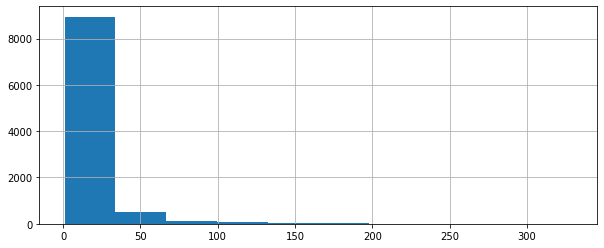

In [11]:
plt.figure(figsize=(10,4))
ratings['No of Ratings'].hist(bins=10)




AttributeError: 'Rectangle' object has no property 'binbins'

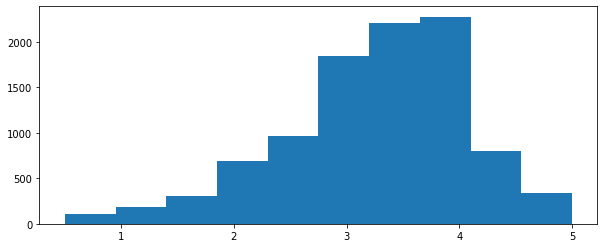

In [12]:
plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(binbins=70) 


In [ ]:
sn.countplot(x="rating" ,data=data)

In [ ]:
data["rating"].hist()

In [ ]:
data.info()

## Data checking if it is null or not

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum()

In [ ]:
moviemat=pd.pivot_table(index='userId',columns="title",values="rating", data=data)
moviemat.head()
moviemat.columns

In [ ]:
moviemat["xXx (2002)"]

In [ ]:
xxx_2002_rating=moviemat['xXx (2002)']
xxx_2002_rating.tail()

In [ ]:
xxx_2002_similarmovies=moviemat.corrwith(xxx_2002_rating)
xxx_2002_similarmovies

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,20))
corr_matrice=data.corr()
sn.heatmap(corr_matrice,annot=True,vmax=.8,square=True)
plt.show()


In [ ]:
xxx_2002_corr=pd.DataFrame(xxx_2002_similarmovies,columns=['correlation'])
xxx_2002_corr.dropna(inplace=True)
xxx_2002_corr